# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    xn = x0
    for n in range(0, maxiter):
        fxn = f(xn)
        if abs(fxn) < eps:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = fder(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [16]:
import numpy as np

def func(x):
    return np.square(x) - 1

def dfunc(x):
    return 2*x

root = newton_iteration(func, dfunc, 0.5, 1e-5)
root

Found solution after 4 iterations.


1.0000000464611474

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [26]:
def mod_func(x):
    return np.square(np.square(x) - 1)

def mod_dfunc(x):
    return 4*(x**3) - 4*x

def modified_newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000, m=1):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    xn = x0
    for n in range(0, maxiter):
        fxn = f(xn)
        if abs(fxn) < eps:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = fder(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - m*fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [32]:
for i in range(1,6):
    modified_newton_iteration(mod_func, mod_dfunc, 4.5, eps=1e-5, maxiter=10000, m=i)

Found solution after 14 iterations.
Found solution after 4 iterations.
Found solution after 9 iterations.
Exceeded maximum iterations. No solution found.
Found solution after 7233 iterations.


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

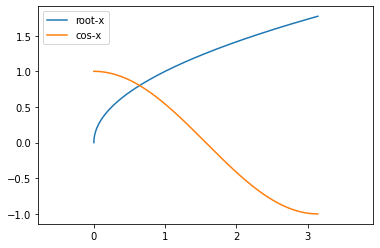

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

domain = np.linspace(0,np.pi, 1000)
root_x = np.sqrt(domain)
cos_x = np.cos(domain)
fig, ax = plt.subplots()
ax.plot(domain, root_x, label='root-x')
ax.plot(domain, cos_x, label='cos-x')
ax.axis('equal')
ax.legend()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

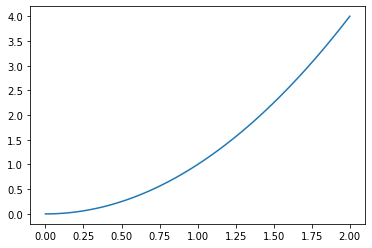

In [5]:
def g(x):
    return np.square(x)

domain = np.linspace(0, 2, 100)
x = g(domain)
plt.plot(domain, x)

In [10]:
x = []
x0 = 1.1
x.append(x0)
for i in range(1,100):
    x0 = g(x0)
    print(x0)
    x.append(x0)
    


1.2100000000000002
1.4641000000000004
2.143588810000001
4.594972986357221
21.1137767453526
445.7915684525922
198730.12250342217
39493661590.22518
1.5597493058032278e+21
2.432817896953651e+42
5.918602919737985e+84
3.5029860521531003e+169
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


/Users/richard.wuebker/.pyenv/versions/science/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


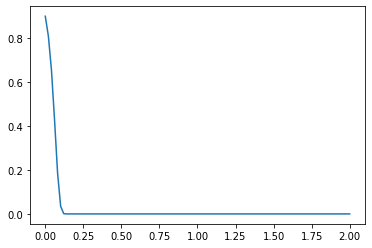

In [8]:
plt.plot(domain, x)